# Рассмотрение примеров

In [1]:
import numpy as np 
import scipy.stats as sts 
import matplotlib.pyplot as plt 
import ipywidgets as widgets 

plt.style.use("default")

In [2]:
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1
    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim((-0.05, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()

**Равномерное распределение**

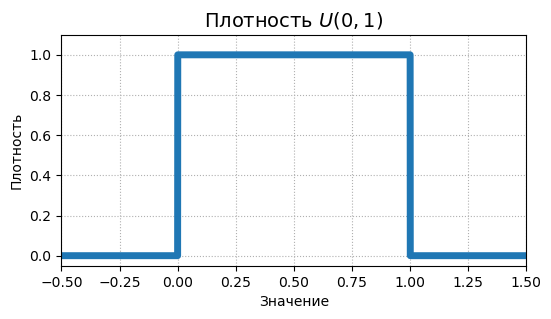

In [3]:
show_pdf(pdf=sts.uniform.pdf, xmin=-0.5, xmax=1.5, grid_size=10000,
        distr_name=r'$U(0, 1)$', loc=0, scale=1) 

In [5]:
ip = widgets.interactive(
    show_pdf, 
    pdf=widgets.fixed(sts.uniform.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
                               value=100, description='$grid\_size$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1,
                            value=1, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1,
                            value=10, description='$x_{max}=$'),
    loc=widgets.FloatSlider(min=1, max=15, step=0.1,
                            value=3, description='$a=$'),
    scale=widgets.FloatSlider(min=0.5, max=10, step=0.01,
                            value=1, description='$b - a=$'),
    distr_name=r'$U$({loc:.2f}, {loc:.2f} + {scale:.2f})'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update()

In [8]:
def plot_uniform(a=0, b=1, n_points=1000):
    plt.figure(figsize=(6, 3))
    sample = sts.uniform.rvs(loc=a, scale=b-a, size=n_points)
    plt.hist(sample, bins=30, density=True, 
             alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(a-(b-a)/6, b+(b-a)/6, n_points)
    plt.plot(grid, sts.uniform.pdf(grid, a, b-a), color='red',
            lw=3, label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim \mathcal{R}$(a,b)', fontsize=14)
    plt.legend(fontsize=10, loc=8)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round((a + b)/2, 3)}') 
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round((b - a)**2 / 12, 3)}') 

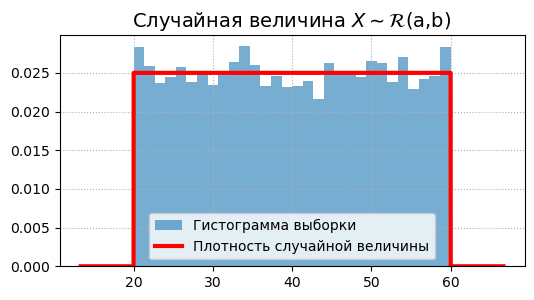

Математическое ожидание: 39.988, а по формуле: 40.0
Дисперсия: 135.762, а по формуле: 133.333


In [13]:
plot_uniform(20, 60, 10000)

**Экспоненциальное распределение**

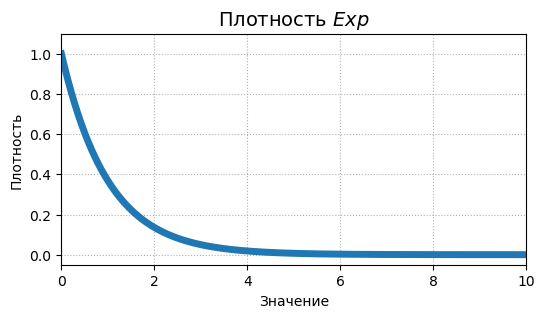

In [14]:
show_pdf(pdf=sts.expon.pdf, xmin=0, xmax=10, grid_size=10000,
        distr_name=r'$Exp$', scale=1) 

In [16]:
ip = widgets.interactive(
    show_pdf, 
    pdf=widgets.fixed(sts.expon.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
                               value=100, description='$grid\_size$'),
    xmin=widgets.FloatSlider(min=0, max=20, step=0.1,
                            value=0, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1,
                            value=10, description='$x_{max}=$'),
    scale=widgets.FloatSlider(min=0, max=5, step=0.01,
                            value=1, description='$1 / \lambda=$'),
    distr_name=r'$Exp$({scale:.2f})'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update()

In [19]:
def plot_exp(lmbd=1, n_points=10000):
    plt.figure(figsize=(6, 3))
    sample = sts.expon.rvs(scale=1/lmbd, size=n_points)
    plt.hist(sample, bins=30, density=True, 
             alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(0, 10, n_points)
    plt.plot(grid, sts.expon.pdf(grid, scale=1/lmbd), color='red',
            lw=3, label='Плотность случайной величины')
    plt.title(r'Exponential', fontsize=14)
    plt.legend(fontsize=10, loc=0)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(lmbd, 3)}') 
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(lmbd**2, 3)}') 

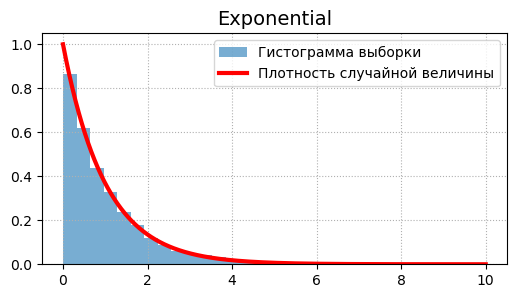

Математическое ожидание: 1.007, а по формуле: 1
Дисперсия: 1.035, а по формуле: 1


In [20]:
plot_exp()

**Нормальное распределение**

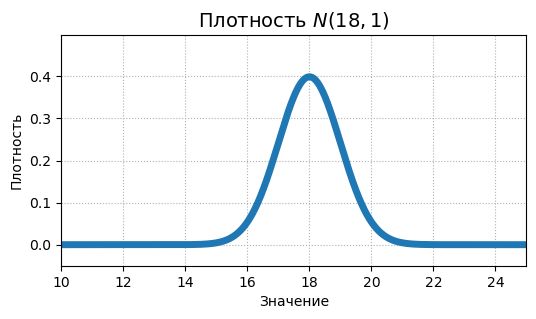

In [65]:
show_pdf(pdf=sts.norm.pdf, xmin=10, xmax=25, grid_size=10000,
        distr_name=r'$N(18, 1)$', loc=18, scale=1) 

In [23]:
ip = widgets.interactive(
    show_pdf, 
    pdf=widgets.fixed(sts.norm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
                               value=100, description='$grid\_size$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1,
                            value=0, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=5, max=25, step=0.1,
                            value=15, description='$x_{max}=$'),
    loc=widgets.FloatSlider(min=-1, max=25, step=0.1,
                            value=10, description='$a=$'),
    scale=widgets.FloatSlider(min=0.01, max=10, step=0.01,
                            value=1, description='$\sigma=$'),
    distr_name=r'$N$({loc:.2f}, {scale:.2f})'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update()

In [24]:
def plot_norm(a=0, sigma=1, n_points=10000):
    plt.figure(figsize=(6, 3))
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n_points)
    plt.hist(sample, bins=30, density=True, 
             alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(a-3*sigma, a+3*sigma, n_points)
    plt.plot(grid, sts.norm.pdf(grid, a, sigma), color='red',
            lw=3, label='Плотность случайной величины')
    plt.title(r'Нормальная величина $X \sim \mathcal{N}$', fontsize=10)
    plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(a, 3)}') 
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(sigma**2, 3)}') 

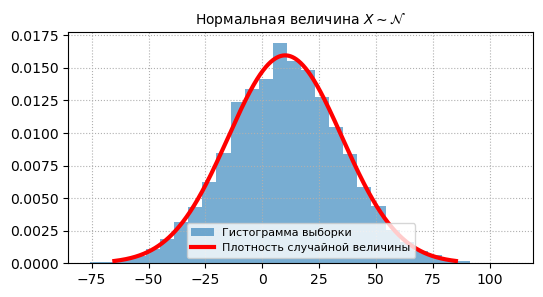

Математическое ожидание: 10.072, а по формуле: 10
Дисперсия: 625.609, а по формуле: 625


In [26]:
plot_norm(10, 25)

**Сравнение графиков плотностей**

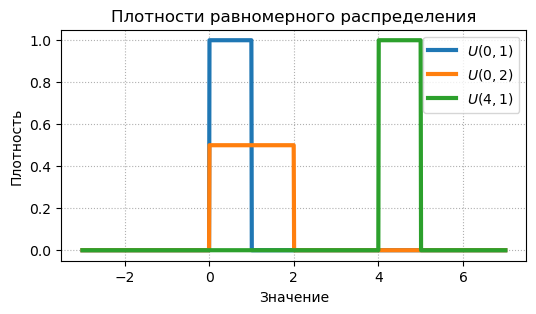

In [31]:
grid = np.linspace(-3, 7, 1000)
loc_values = [0, 0, 4]
scale_values = [1, 2, 1]

plt.figure(figsize=(6, 3)) 
for i, (loc, scale) in enumerate(zip(loc_values, scale_values)):
    plt.plot(grid, sts.uniform(loc, scale).pdf(grid), lw=3,
            label='$U' + '({}, {})$'.format(loc, scale))
    
plt.legend(fontsize=10)
plt.title('Плотности равномерного распределения', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Плотность', fontsize=10)
plt.grid(ls=':')
plt.show()

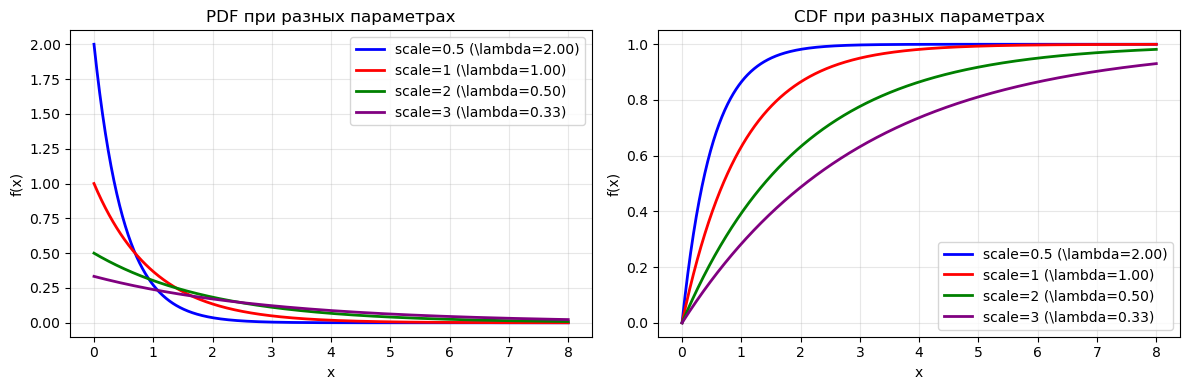

In [33]:
scales = [0.5, 1, 2, 3] 
colors = ['blue', 'red', 'green', 'purple']

x = np.linspace(0, 8, 1000)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for scale, color in zip(scales, colors):
    pdf = sts.expon(scale=scale).pdf(x)
    plt.plot(x, pdf, color=color, linewidth=2, 
            label=f'scale={scale} (\lambda={1/scale:.2f})')
plt.title('PDF при разных параметрах')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2) 
for scale, color in zip(scales, colors):
    cdf = sts.expon(scale=scale).cdf(x)
    plt.plot(x, cdf, color=color, linewidth=2, 
            label=f'scale={scale} (\lambda={1/scale:.2f})')
plt.title('CDF при разных параметрах')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

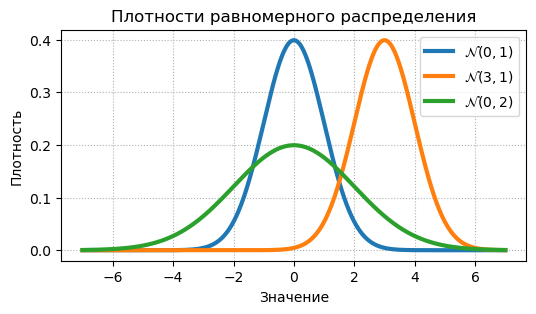

In [34]:
grid = np.linspace(-7, 7, 1000)
loc_values = [0, 3, 0]
scale_values = [1, 1, 2]

plt.figure(figsize=(6, 3)) 
for i, (a, sigma) in enumerate(zip(loc_values, scale_values)):
    plt.plot(grid, sts.norm(a, sigma).pdf(grid), lw=3,
            label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))
    
plt.legend(fontsize=10)
plt.title('Плотности равномерного распределения', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Плотность', fontsize=10)
plt.grid(ls=':')
plt.show()

# Исследование распределения хи-квадрат

Распределением хи-квадрат с k степенями свободы называется распределение суммы квадратов k независимых случайных величин, распределенных по стандартному нормальному закону, т.е.
$$
\chi^{2} = \sum_{i=1}^{k} Z_{i}^{2},
$$
где $Z_{i}$ (i = 1, 2, ..., k) имеет нормальное распределение N(0;1).

Распределение хи-квадрат с k степенями свободы обозначается $\chi^{2}(k)$ 

Плотность вероятности распределения $\chi^{2}$ имеет вид:
$$
\phi(x)=\begin{cases}
\frac{1}{2^{\frac{k}{2}} \cdot{Г(\frac{k}{2})}} x^{\frac{k}{2}-1} e^{-\frac{x}{2}} &\text{при $x\geqslant0$,}\\
0 &\text{при $x<0$,}
\end{cases}
$$
где $Г(y) = \int\limits_0^\infty{e^{-t}t^{y-1}dt}$ - гамма-функция Эйлера (для целых положительных значений Г(y) = (y-1)!).

**Рассмотрим плотности при разных степенях свободы**

В библиотеке scipy.stats распределение хи-квадрат реализовано классом chi2. Основной параметр: df — число степеней свободы (k).
Методы аналогичны другим непрерывным распределениям: .pdf(), .cdf(), .rvs(), .mean(), .var() и др.

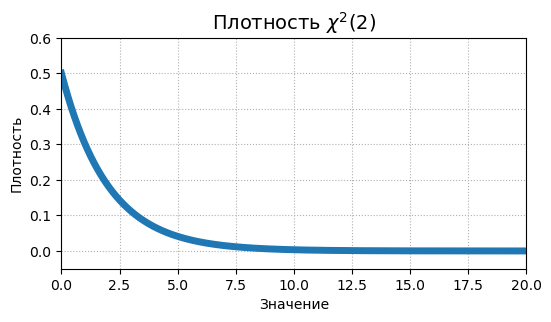

In [46]:
show_pdf(pdf=sts.chi2.pdf, xmin=0, xmax=20, grid_size=1000,
         distr_name=r'$\chi^2(2)$', df=2)

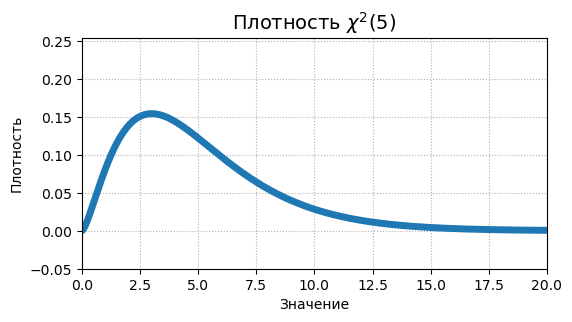

In [47]:
show_pdf(pdf=sts.chi2.pdf, xmin=0, xmax=20, grid_size=1000,
         distr_name=r'$\chi^2(5)$', df=5)

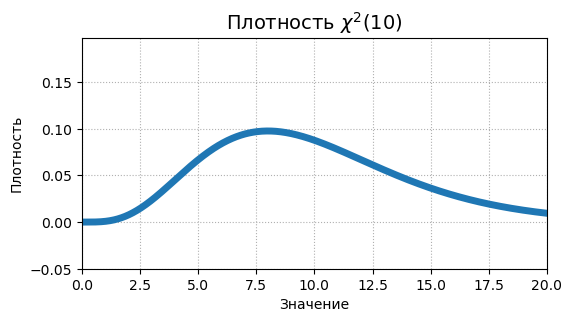

In [48]:
show_pdf(pdf=sts.chi2.pdf, xmin=0, xmax=20, grid_size=1000,
         distr_name=r'$\chi^2(10)$', df=10)

Кривые $\chi^2$-распределения для различных значений числа степеней свободы k, приведенные выше, показывают, что $\chi^2$-распределение асимметрично, обладает правосторонней асимметрией.

**Рассмотрим зависимость плотности от параметров хи-квадрат распределения**

In [60]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.chi2.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
                               value=100, description='$grid\_size$'),
    xmin=widgets.FloatSlider(min=0, max=5, step=0.5, 
                             value=0, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=5, max=50, step=1, 
                             value=20, description='$x_{max}=$'),
    df=widgets.FloatSlider(min=1, max=30, step=0.01, 
                           value=5, description='$k=$'),
    distr_name=r'$\chi^2({df:.2f})$'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update()


При k > 30 распределение случайной величины $Z=\sqrt{2\chi^2}-\sqrt{2k-1}$ близко к стандартному нормальному закону, т.е. N(0;1).

**Сравнение плотности распределения хи-квадрат и гистограммы**

In [66]:
def plot_chi2(k, n_points=10000):
    plt.figure(figsize=(6, 3))
    sample = sts.chi2.rvs(df=k, size=n_points)
    plt.hist(sample, bins=30, density=True, 
             alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(0, max(sample), n_points)
    plt.plot(grid, sts.chi2.pdf(grid, df=k), color='red', 
             lw=3, label='Плотность случайной величины')
    plt.title(r'$\chi^2$', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {sample.mean():.3f}, а по формуле: {k}')
    print(f'Дисперсия: {sample.var():.3f}, а по формуле: {2*k}')

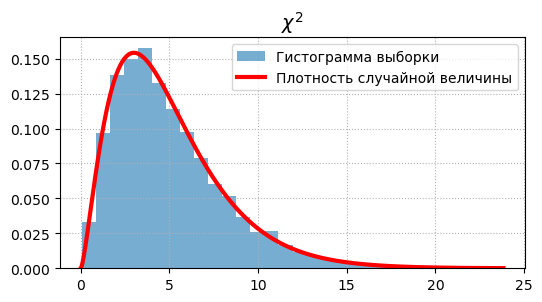

Математическое ожидание: 5.006, а по формуле: 5
Дисперсия: 10.034, а по формуле: 10


In [67]:
plot_chi2(5) 

Для $\chi^2$ распределения математическое ожидание: k, а дисперсия: 2k.

**Сравнение графиков плотностей**

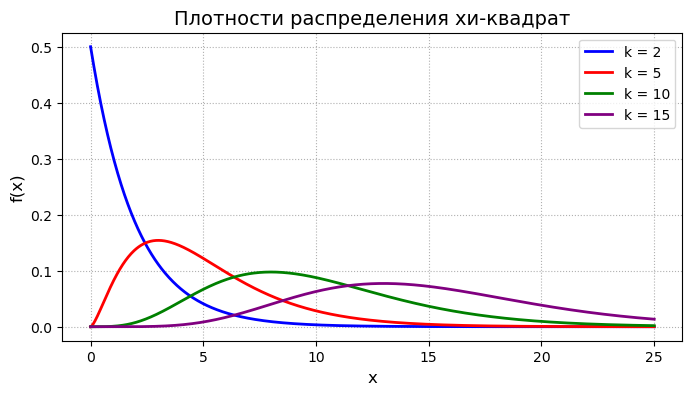

In [70]:
k_values = [2, 5, 10, 15]
colors = ['blue', 'red', 'green', 'purple']
x = np.linspace(0, 25, 1000)

plt.figure(figsize=(8, 4))
for k, c in zip(k_values, colors):
    plt.plot(x, sts.chi2.pdf(x, df=k), lw=2, color=c, label=f'k = {k}')
plt.title('Плотности распределения хи-квадрат', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend()
plt.grid(ls=':')
plt.show()